In [373]:
import pandas as pd
import numpy as np
import yfinance as yf
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
import tensorflow_datasets as tfds

from scipy.stats import chi2_contingency
from collections import Counter
from distfit import distfit

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Review

Let us start with a review:

## Data Ingestion

Data ingestion is the process of importating data into your working environment. It is a critical step in any data analysis endeavor. Data can manifest in various forms, residing in files, databases, or accessible via specific URLs. The location and format of the data dictate the methods by which it can be imported or ingested into your analytical workspace. While we have primarily utilized the Pandas library for data ingestion thus far, it's essential to be aware of other viable options at your disposal.

### Local Files

#### Structured Data (e.g., CSV, Excel, Arrow, and Parquet)

[Pandas](https://pandas.pydata.org/) stands as an excellent choice for ingesting structured data formats, particularly those exhibiting an array or matrix-like structure, such as [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) or [Excel](https://en.wikipedia.org/wiki/Office_Open_XML) files. Pandas provides powerful tools for efficiently handling and manipulating data in these formats. 

There are two other important file format you should be familar: [**parquet**](https://parquet.apache.org/) and [**arrow**](https://arrow.apache.org/). 

Both Parquet and Arrow data file formats are columnar storage formats designed for optimized data processing and analytics. These are highly efficient for complex data structures, as they store data column-wise, enabling compression and encoding techniques for improved query performance. These formats are particularly well-suited for big data and data warehousing applications, as they can significantly reduce I/O and improve query execution times. Additionally, Parquet files maintain schema information, making them self-descriptive and suitable for use in distributed computing frameworks like Apache Hadoop and Apache Spark.

#### Tree-like Data (e.g., JSON, XML, and HDF)

However, when dealing with tree-like file formats like [JSON](https://www.json.org/json-en.html) or [XML](https://en.wikipedia.org/wiki/XML), alternative approaches are necessary. Python offers specialized libraries for this purpose.

For **JSON data**, Python's built-in [json](https://docs.python.org/3/library/json.html) library serves as an excellent choice, enabling the reading and writing of JSON data. Imported JSON files are typically converted into Python dictionaries, making them accessible for data analysis.

When it comes to **XML data**, you have a range of options to consider. The choice depends on your parsing requirements, whether it's working with the full tree-like structure or serialized data. An option worth considering, especially for serialized XML, is [xmltodict](https://pypi.org/project/xmltodict/), a Python library that simplifies XML parsing and handling.

Even though we haven't worked out any examples in this class yet, **HDF**  (Hierarchical Data Format) is an important data file format.  It is a versatile and widely used file format mainly used in academia and large organizations such as NASA, NOOA, USGS, ERC etc. for the storage and management of large and complex datasets. HDF files are known for their efficiency in handling diverse data types, including numerical, textual, and structured data, making them a preferred choice for scientific, engineering, and data-intensive applications. HDF files organize data hierarchically, allowing for the creation of multi-dimensional datasets and the inclusion of metadata, making it particularly valuable for preserving data structures and attributes. This format's compatibility with numerous programming languages and its support for parallel and distributed computing further contribute to its popularity in scientific research, simulations, and data storage and exchange.

### Databases

In practice, you'll often encounter situations where data is not only collected but also stored and managed in databases. Many of these databases employ the standardized language for managing data, [SQL](https://en.wikipedia.org/wiki/SQL). Irrespective of the specific database provider, most programming languages, including Python, offer unified APIs for database interactions through RDBMS (Relational Database Management System) libraries.

Python provides a variety of options for database interactions, and the choice may depend on your particular needs. For seamless compatibility with Pandas, [DuckDB](https://duckdb.org/) is a viable choice with smooth data interchange. However, if you are dealing with a full-fledged database server, [rdbms](https://pypi.org/project/rdbms/) is a suitable library for your interactions. It's worth noting that gaining proficiency in SQL and familiarizing yourself with several RDMS libraries is an investment that can greatly enhance your data analysis capabilities.

### Data Ingestion via APIs

In addition to the aforementioned data sources, another avenue for data ingestion is through Application Programming Interfaces (APIs). APIs offer programmatic access to various data repositories, enabling real-time data retrieval and integration, expanding your data acquisition toolkit. Understanding how to work with APIs is an essential skill for accessing dynamic data sources and staying current with the latest information in your field of analysis.

An [API](https://en.wikipedia.org/wiki/API) is a semi-standard way of querying a data source. Instead of using a standard database query language such as SQL, an API uses structured URLs to query data.

Let us look at the following example that you were supposed to use in HW1:

    https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr,tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/TUR?_format=json

Let us split this into pieces. 

The base URL is `https://cckpapi.worldbank.org/cckp/v1/` the rest is about the data we would like to download. Notice that individual pieces are separated by `,`. The pieces are

1. `cru-x0.5_timeseries_pr`: precipitation data
2. `tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean`: surface temperatures data from 1901 to 2022
4. `TUR`: data is requested for Turkey
5. `_format=JSON`: the format is JSON

Each data source has its own syntax for the URL for their API. You will need to dig in and understand, or use a specific python library that communicates with the API. For example, the world bank has a [specific library](https://pypi.org/project/wbgapi/) to communicate with their [data service](https://data.worldbank.org/).

## Data Cleaning

Exploring data involves conducting a thorough analysis to understand its inherent structural characteristics, detect potential irregularities, and glean insightful information in preparation for subsequent analytical processes. On the other hand, data cleaning encompasses the rectification of various data anomalies, which includes addressing missing values, removing redundancies, and ensuring the uniformity of data.

### Data Inspection

Proficiency in data inspection is essential for gaining an initial grasp of the dataset's composition. This proficiency is attained by utilizing key methods such as `head()`, `tail()`, `info()`, `describe()`, and the `shape` attribute. These methods provide crucial insights into the dataset, including the first and last data records, data type information, summary statistics, and the dataset's dimensions.

### Data Type Conversion

A fundamental understanding of data type conversion is necessary for aligning data types with the specific requirements of an analytical task. This involves skillfully employing the `astype()` method to accurately adjust data types, thereby enhancing data representation accuracy and optimizing memory resource utilization.

### Handling Missing and Duplicate Data 

Recognizing the importance of addressing missing data within a dataset is imperative. It necessitates mastery of techniques for identifying absent data instances, achieved through the use of methods such as `isna()` and `isnull()`. Moreover, effectively dealing with missing data involves skillful application of corrective measures, including the use of `dropna()`, `fillna()`, or methods designed for imputing missing values.

Along with missing data, identifying and subsequently removing duplicate data entries is also important. Techniques such as `duplicated()` and `drop_duplicates()` are indispensable for this purpose. Eliminating duplicates is critical, as their presence can distort the outcomes of analytical procedures and compromise the accuracy of data-driven conclusions.

## Operations on Data

In data analysis, there are four fundamental categories of operations that can be applied to any data collection, regardless of its complexity or size:

1. **Merging**: This operation involves the integration of two or more distinct data sources into a cohesive and unified dataset. By merging, we consolidate information from different origins, allowing for a more comprehensive analysis and understanding of the underlying data. In practice, this can be achieved through various techniques, such as concatenation, joining, or union operations.

2. **Filtering**: Data often needs to be refined by selecting specific elements based on predefined criteria. Filtering serves as the mechanism for isolating relevant data that meets certain conditions. This process is instrumental in extracting valuable insights from a dataset while eliminating noise and irrelevant information.

3. **Grouping**: Grouping enables the organization of data into subsets or sub-collections based on shared characteristics or attributes. This operation is particularly useful when analyzing data at different hierarchical levels or when aggregating data to observe trends within specific categories. It allows for the structured examination of data patterns and relationships.

4. **Applying Functions**: The application of functions to a data collection is a versatile technique for transforming, manipulating, or deriving new information from the existing data. Functions can be custom-built or predefined, and they serve as the computational engine for various data processing tasks. These functions can range from mathematical operations to complex data transformations.

Up to this point, we have executed these fundamental data operations using two primary approaches: the Pandas library, which offers a rich ecosystem for data manipulation in Python, and SQL, with the assistance of a database system like DuckDB. These tools provide robust capabilities for performing these operations, each with its own set of advantages and use cases.

### The Pandas Way

Certainly, let's explore how a data scientist can use Pandas to merge, filter, group, and apply functions to data with relevant examples:

1. **Merging Data**:

   Data scientists often need to combine data from multiple sources to perform comprehensive analysis. For instance, let's say you have two datasets: one containing customer information and another containing their purchase history. You can merge these datasets based on a common column, like customer ID, using Pandas:

   ```python
   import pandas as pd

   # Load customer and purchase data
   customers = pd.read_csv('customer_data.csv')
   purchases = pd.read_csv('purchase_history.csv')

   # Merge the data using a common key (e.g., Customer ID)
   merged_data = pd.merge(customers, purchases, on='CustomerID')
   ```

2. **Filtering Data**:

   Data scientists often need to filter data to extract relevant information. Let's assume you want to filter the merged dataset to include only purchases made in a specific year:

   ```python
   # Filter purchases for the year 2022
   filtered_data = merged_data[merged_data['Year'] == 2022]
   ```

3. **Grouping Data**:

   Data scientists frequently group data to perform aggregate operations. For example, you may want to group the filtered data by product category and calculate the total sales for each category:

   ```python
   # Group data by 'ProductCategory' and calculate total sales
   grouped_data = filtered_data.groupby('ProductCategory')['SalesAmount'].sum()
   ```

4. **Applying Functions**:

   Data scientists often apply custom functions to derive insights. Suppose you want to calculate the profit margin for each product category, which requires a custom function:

   ```python
   # Define a custom function to calculate profit margin
   def calculate_profit_margin(row):
       return (row['Profit'] / row['Revenue']) * 100

   # Apply the custom function to each row
   grouped_data['ProfitMargin'] = grouped_data.apply(calculate_profit_margin, axis=1)
   ```

### The SQL Way

Certainly, let's go through the same examples using SQL in combination with DuckDB, a database management system:

1. **Merging Data**:

   To merge data in SQL with DuckDB, you would typically perform a SQL JOIN operation. Assuming you have two tables, `customers` and `purchases`, you can merge them using SQL as follows:

   ```sql
   -- Merge the data using a common key (CustomerID)
   SELECT *
   FROM customers
   INNER JOIN purchases ON customers.CustomerID = purchases.CustomerID;
   ```

2. **Filtering Data**:

   To filter data in SQL with DuckDB, you can use the `WHERE` clause to specify the condition for filtering. Let's say you want to filter purchases made in the year 2022:

   ```sql
   -- Filter purchases for the year 2022
   SELECT *
   FROM merged_data
   WHERE Year = 2022;
   ```

3. **Grouping Data**:

   SQL allows you to group data using the `GROUP BY` clause and perform aggregate operations. For instance, to group the filtered data by product category and calculate the total sales:

   ```sql
   -- Group data by ProductCategory and calculate total sales
   SELECT ProductCategory, SUM(SalesAmount) AS TotalSales
   FROM filtered_data
   GROUP BY ProductCategory;
   ```

4. **Applying Functions**:

   You can define and use custom functions in SQL as well. For calculating profit margin for each product category, you can create a custom function like this:

   ```python
   # Define a custom function to calculate profit margin
   def calculate_profit_margin(row):
       return (row['Profit'] / row['Revenue']) * 100

   duckdb.create_function('CalculateProfitMargin', calculate_profit_margin)
   ```
   
   and the corresponding SQL query that you need to pass is

   ```sql
   -- Apply the custom function to calculate profit margin
   SELECT ProductCategory, SUM(Profit) AS TotalProfit, SUM(Revenue) AS TotalRevenue,
          CalculateProfitMargin(SUM(Profit), SUM(Revenue)) AS ProfitMargin
   FROM grouped_data
   GROUP BY ProductCategory;
   ```

# Lecture 5: Feature Engineering

Today, we will be discussing important topics in data science. We will particularly focus on feature engineering and data-cleaning techniques. The main points of today's lecture are as follows:

- Feature Types
- Constructing New Features
- Encoding unordered categorical data
- Encoding unstructured data
- Dimensionality Reduction: Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA)
- Practical Applications

## Feature Types

In our exploration of data, we have primarily focused on structured data, which can exhibit a matrix-like or tree-like structure. Within these structured data formats, features play a pivotal role. Features can be thought of as the individual characteristics or attributes that define each column within a dataset. These features come in different types, each with its own specific characteristics and relevance for data analysis:

1. **Numerical**: Numerical features are those that represent quantifiable data, typically expressed as numbers. They are suitable for mathematical operations and are essential for tasks such as statistical analysis, regression, and various modeling techniques.

2. **Ordered Categorical**: Ordered categorical features pertain to data with discrete categories that possess a meaningful order or hierarchy. These features are valuable for tasks that involve ranking or prioritizing, such as customer satisfaction levels or education levels.

3. **Unordered Categorical**: Unordered categorical features, in contrast, represent data with distinct categories that lack a natural order or hierarchy. These categories are typically used for grouping or classification purposes, such as colors or product categories.

4. **Timestamps**: Timestamp features capture time and date information. They are crucial for time-series analysis, event sequencing, and tracking changes over time.

5. **Free-form String**: Free-form string features encompass text data and are characterized by their unstructured nature. These features are versatile and can be utilized for tasks such as natural language processing, text mining, and sentiment analysis.

Recognizing and understanding the various feature types within a dataset is essential, as it informs the choice of appropriate data analysis techniques and tools tailored to the specific characteristics of the data at hand.  Each of these feature types requires a special type of encoding for us to process them correctly. And, this brings us to the subject of this lecture:

## Feature Engineering

Feature Engineering is an umbrella term that encompasses the process of constructing new features from the given raw data. This important step in data preprocessing helps to reveal hidden patterns and relationships within the information that may not be immediately apparent. For example, a dataset containing the date and time of automobile accidents could be improved by adding features such as the day of the week or whether the accident occurred during daytime or nighttime hours.

One such feature engineering technique is about transforming categorical data into (semi)numerical data. This is called *encoding*. Today, we will specifically discuss encoding unordered categorical data called "one-hot-encoding". This technique is essential for transforming categorical variables, which may have no inherent ordinal relationship, into a format that can be utilized by machine learning algorithms. For example, consider a dataset containing information about car brands such as Toyota, Ford, and Honda. One-Hot Encoding would convert this categorical variable into several binary features, each representing the presence or absence of a particular brand.

We will also delve into encoding unstructured data, such as images and text. Unlike structured data, which is organized in neat rows and columns, unstructured data requires specific methods to be converted into a machine-readable format. For instance, image files can be represented as arrays of pixel values, and text data can be encoded using techniques like Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), or Word Embeddings.

In addition, we will examine dimensionality reduction methods, such as Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA). Dimensionality reduction aims to reduce the number of features in a dataset while preserving essential information. This helps to mitigate problems associated with high-dimensional data, such as increased computational complexity and poor model performance due to the "curse of dimensionality". PCA is widely used for unsupervised dimensionality reduction, while LDA is a supervised technique that is particularly useful for classification tasks.

Lastly, we will conclude the lecture by working through some detailed examples that demonstrate the practical application of these concepts in real-world data science projects. These examples will aid in solidifying your understanding of the topics covered and provide an opportunity to witness their effectiveness in addressing common challenges faced by data scientists.

## Creating New Features from Existing Data

Feature engineering is the process of creating new features or transforming existing features in order to enhance the performance of machine learning models and uncover hidden patterns within the data. This can be accomplished through various techniques, including domain knowledge, mathematical transformations, and combinations of existing features. When done effectively, feature engineering can significantly improve the quality of the insights gained from data analysis and make it easier for algorithms to learn complex relationships within the data.

Let's explore some widely used techniques for feature engineering:

1. **Domain Knowledge**: Utilizing domain-specific knowledge about the problem and the data's context can help in generating new and meaningful features. For example, in a dataset related to housing prices, creating a new feature 'price per square foot' by dividing the price by the area could provide valuable information that is not directly available in the original features.

2. **Encoding**: Categorical data does not come in numerical form. Converting ordered or unordered categorical data into numerical form allows us to use standard visualization techniques, and using many machine learning algorithms on the encoded data.

4. **Discretization and Binning**: Converting continuous features into discrete intervals or categories can aid in uncovering patterns, particularly those that might be non-linear or non-monotonic. This can involve defining custom thresholds or using algorithms like decision trees and clustering algorithms to automatically find suitable bins.

2. **Mathematical Transformations**: Applying mathematical transformations to existing features can help reveal patterns or relationships that were not previously apparent. Some common transformations include taking logarithms, square roots, or reciprocals, which can help normalize the data, reveal underlying patterns, or adjust highly skewed distributions.

3. **Dimensionality Reductions/Projections**: Sometimes, the data we have will contain too many features which makes descriptive statistics unusable since it is not clear which feature is important. Moreover, the high number of features makes it impossible to visualize the data. In such situations, we can reduce the number of features by looking at different options of projections such as Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

6. **Temporal and Geospatial Engineering**: In time series data, creating features such as moving averages, lagged values, or seasonal components can reveal hidden patterns and trends. For geospatial data, generating features like distance to landmarks, population density, or geographic regions can provide valuable information to models.


We have seen many examples of structured data consisting of numerical vectors and categorical data, all in a structured format, that is, in a rectangular format. Consider the following examples:

**Wine dataset**

In [2]:
wine = fetch_ucirepo(id=109) 
  
wine['data']['features']

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


This dataset has 178 rows and 13 columns containing numerical features, describing various properties of wine samples.

**Car dataset**

In [3]:
cars = fetch_ucirepo(id=19) 

cars['data']['features']

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


This dataset has 1728 rows and 6 columns representing categorical features, describing the characteristics of different cars.

Both examples represent structured data with different types of information, but the challenge lies in visualizing and analyzing the data effectively, especially when it is not in numerical format or has high dimensions.

## Projections

One solution to this problem is dimensionality reduction, which allows us to visualize data in a lower-dimensional space. There are several methods to do this, some of which include:

- Supervised (Linear Discriminant Analysis, LDA)
- Unsupervised (Principal Component Analysis, PCA)

For example, let's look at the 13-dimensional wine dataset projected onto a 2-dimensional space using PCA:

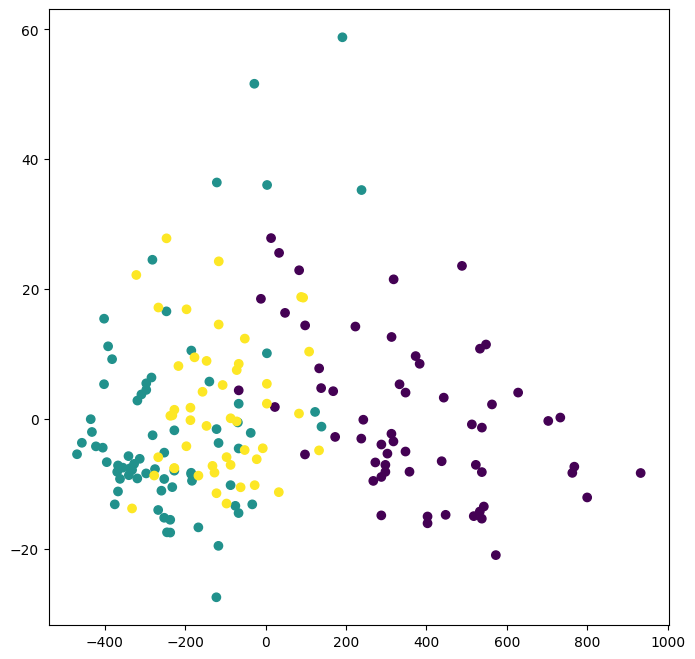

In [128]:
X = wine['data']['features']
y = wine['data']['targets']

projector = PCA(n_components=2)
X_projected = projector.fit_transform(X)

plt.figure(figsize=(8, 8))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y.T)

We can also perform a similar projection using LDA:

/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


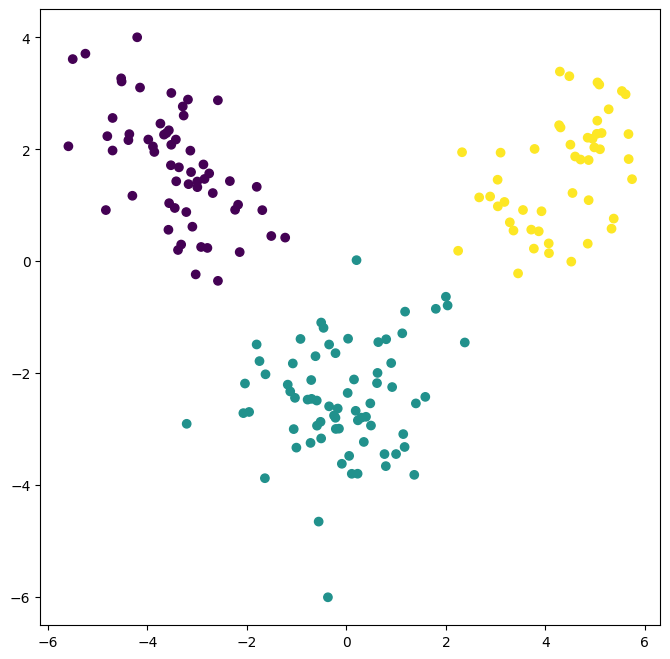

In [129]:
projector = LDA(n_components=2)

X_projected = projector.fit_transform(X,y)
plt.figure(figsize=(8,8))
plt.scatter(X_projected[:,0], X_projected[:,1],c=y.T)

However, these visualization techniques only work for numerical vectors. So, how can we encode categorical data in a numerical format?

### Encoding Categorical Data

To represent categorical data in a numerical form, suitable for machine learning algorithms and data visualization techniques, we can use various encoding techniques. One widely used technique is One-Hot Encoding, which allows us to convert unordered categorical data into binary features, representing the presence or absence of a particular category.

For example, let's encode the categorical features of the car dataset:

In [171]:
encoded_cars = pd.get_dummies(cars['data']['features']).replace({True: 1, False: 0})
encoded_cars.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1



This will transform the original categorical data into a numerical format, where each unique category within a feature is represented as a separate binary column. Now, we can perform data visualization and analysis on this encoded dataset using methods such as PCA or LDA, enhancing our understanding of the relationships and patterns within the data.

By applying encoding techniques and using appropriate dimensionality reduction methods, we can effectively analyze and visualize complex, high-dimensional datasets, even when they consist of categorical or unstructured data. This is an essential skill for any data scientist working with diverse data sources in real-world applications.nil

In [172]:
y = cars['data']['targets'].replace({'unacc':0, 'acc':1, 'good': 2, 'vgood': 3})
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1723,2
1724,3
1725,0
1726,2


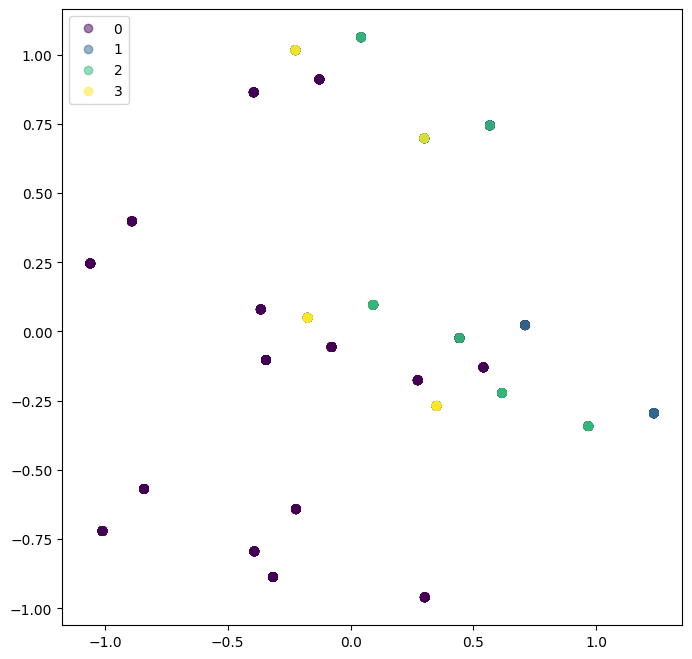

In [173]:
projector = PCA(n_components=2)
X_projected = projector.fit_transform(encoded_cars)

plt.figure(figsize=(8,8))
sc = plt.scatter(X_projected[:,0],X_projected[:,1],c=y.T,alpha=0.5)
plt.legend(*sc.legend_elements(),loc='upper left')

/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


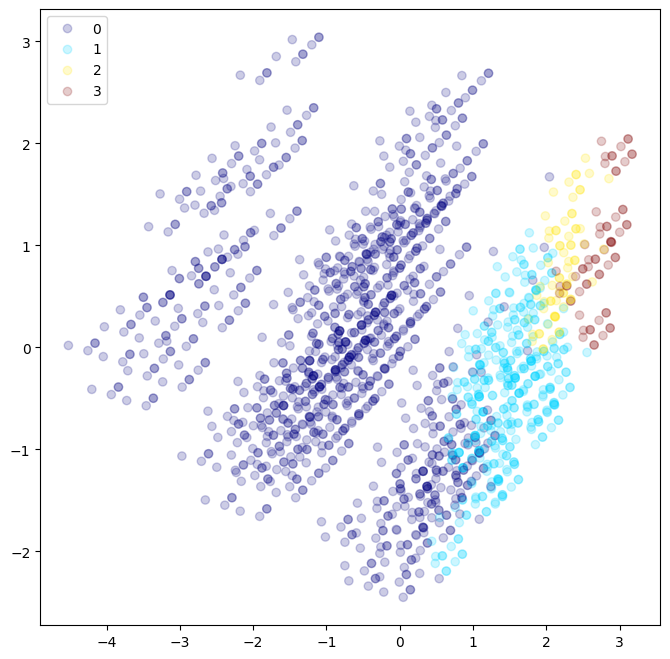

In [174]:
projector = LDA(n_components=2)

X_projected = projector.fit_transform(encoded_cars,y)
plt.figure(figsize=(8,8))
sc = plt.scatter(X_projected[:,0],X_projected[:,1],c=y.T,alpha=0.2,cmap='jet')
plt.legend(*sc.legend_elements(),loc='upper left')

## Discretization/Binning

Instead of going from categorical to numerical, we can go in the opposite direction and convert numerical data into categorical data. One way to do this is by [binning](https://en.wikipedia.org/wiki/Data_binning). The typical example of binning is doing a [histogram](https://en.wikipedia.org/wiki/Histogram):


<Axes: xlabel='Ash', ylabel='Count'>

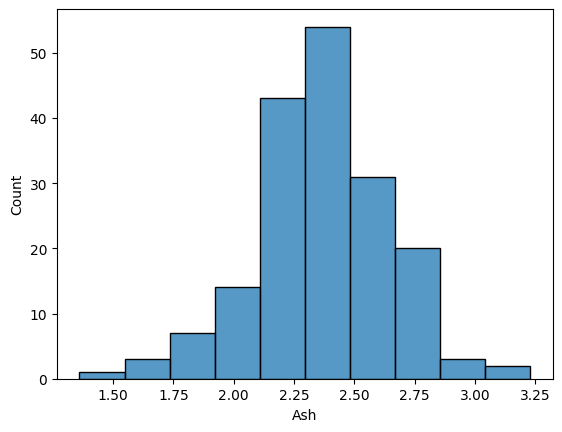

In [180]:
sns.histplot(wine['data']['features']['Ash'],bins=10)

If the feature is already discrete, we don't have to bin it. Instead, we can group and count them according to their labels.

<Axes: xlabel='class'>

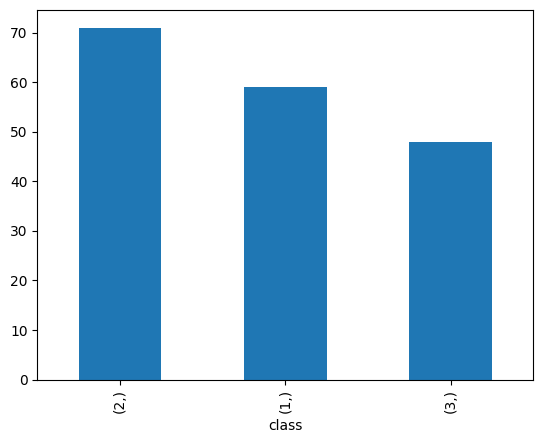

In [185]:
wine['data']['targets'].value_counts().plot(kind='bar')

<Axes: xlabel='class'>

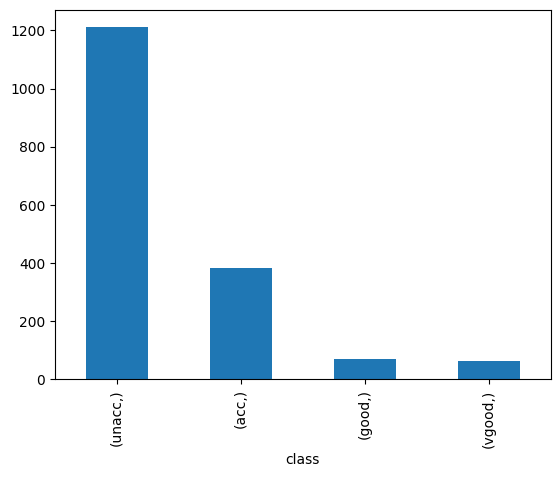

In [183]:
cars['data']['targets'].value_counts().plot(kind='bar')

By binning the feature, we create labels according to which bin the data point lies in. For example, let us split the wine dataset according to their quartiles. I will split the data into 3 pieces: 

1. 'low': data points that lie in the lower one third (0 to 33)
2. 'medium`: data points that lie in the middle one third (33 to 66)
3. 'high': data points that lie in the upper one third (66 to 100)

In [186]:
alcohol_discrete = pd.qcut(wine['data']['features']['Alcohol'], q=[0.0,0.33,0.66,1.0], labels=['low','medium','high'])
alcohol_discrete

0        high
1      medium
2      medium
3        high
4      medium
        ...  
173      high
174    medium
175    medium
176    medium
177      high
Name: Alcohol, Length: 178, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [187]:
wine['data']['features']['Alcohol'].groupby(alcohol_discrete).mean()

/tmp/ipykernel_237160/36359962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine['data']['features']['Alcohol'].groupby(alcohol_discrete).mean()


Alcohol
low       12.071017
medium    13.001207
high      13.899180
Name: Alcohol, dtype: float64

In [192]:
wine['data']['features']['Flavanoids'].groupby(alcohol_discrete).mean()

/tmp/ipykernel_237160/849769832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine['data']['features']['Flavanoids'].groupby(alcohol_discrete).mean()


Alcohol
low       1.947458
medium    1.657414
high      2.461967
Name: Flavanoids, dtype: float64

In [194]:
classes = wine['data']['targets'].to_numpy().reshape(178)
pd.crosstab(classes,alchohol_discrete)

Alcohol,low,medium,high
row_0,,,
1,0,16,43
2,53,15,3
3,6,27,15


In [195]:
flavanoids_discrete = pd.qcut(wine['data']['features']['Flavanoids'],q=[0.0,0.33,0.66,1.0], labels=['low','medium','high'])
pd.crosstab(classes,alchohol_discrete)

Alcohol,low,medium,high
row_0,,,
1,0,16,43
2,53,15,3
3,6,27,15


## Mathematical Tranformations

Sometimes, looking at the data as-it-is is not going to reveal much information. In such cases, we might have to transform some, or all, of the features using mathematical transformations. We have seen examples of such transformations above such as PCA, LDA, tSNE. However, there are simpler such transformations.

In the case of time series data, specifically price series of stocks, the data as is does not show internal variations over time in their original scale.

In [197]:
AAPL = yf.download('AAPL')
AAPL

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.440002,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,171.100006,57157000


For example, if we look at Apple's stock prices it would seem like there were no fluctuations between 1980 and 2009.

<Axes: xlabel='Date'>

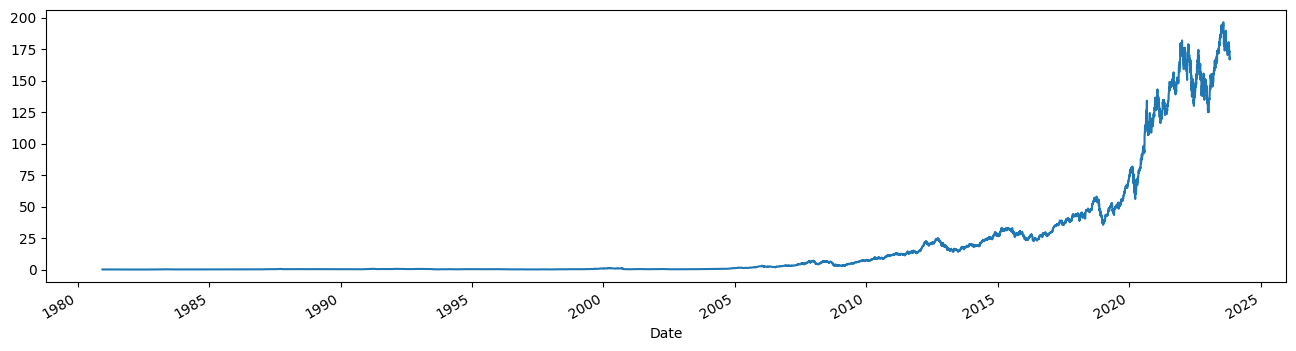

In [202]:
AAPL['Close'].plot(figsize=(16,4))

But let us look at the same graph with the y-axis on the log-scale:

<Axes: xlabel='Date'>

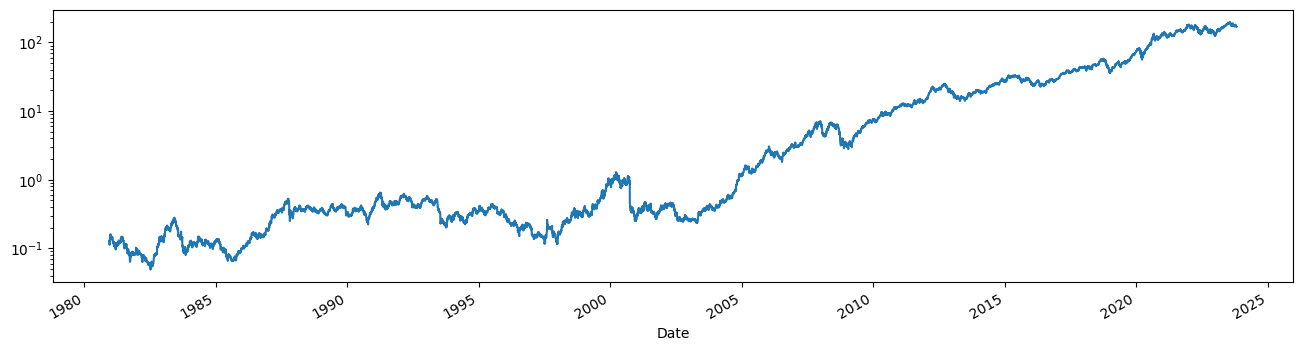

In [203]:
AAPL['Close'].plot(figsize=(16,4),logy=True)

The data seems to be **discontinuous**. We can smooth it out by doing a [moving average](https://www.investopedia.com/terms/m/movingaverage.asp#:~:text=A%20moving%20average%20is%20a,price%20trends%20for%20specific%20securities.).

<Axes: xlabel='Date'>

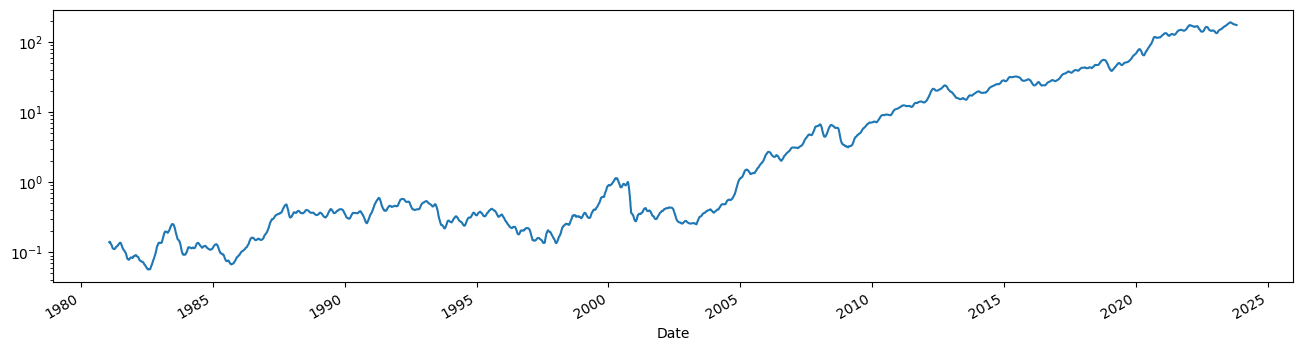

In [253]:
AAPL['Close'].rolling(window=30).mean().plot(figsize=(16,4),logy=True)

<Axes: xlabel='Close', ylabel='Count'>

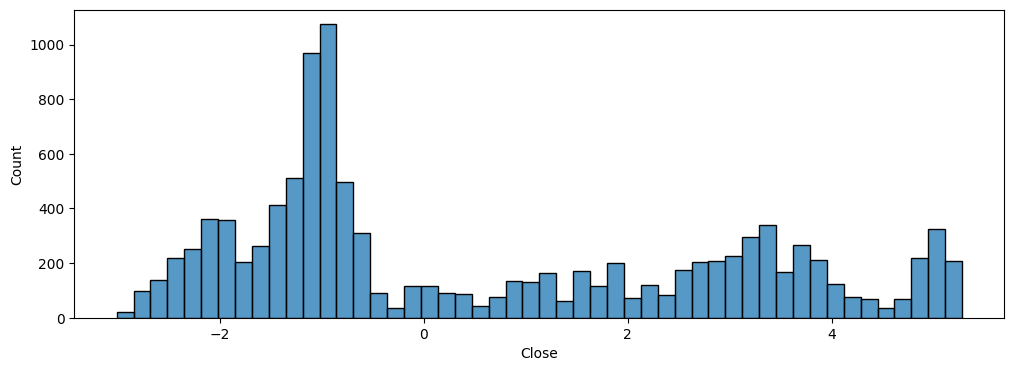

In [212]:
plt.figure(figsize=(12,4))
sns.histplot(np.log(AAPL['Close']),bins=50)

<Axes: ylabel='Count'>

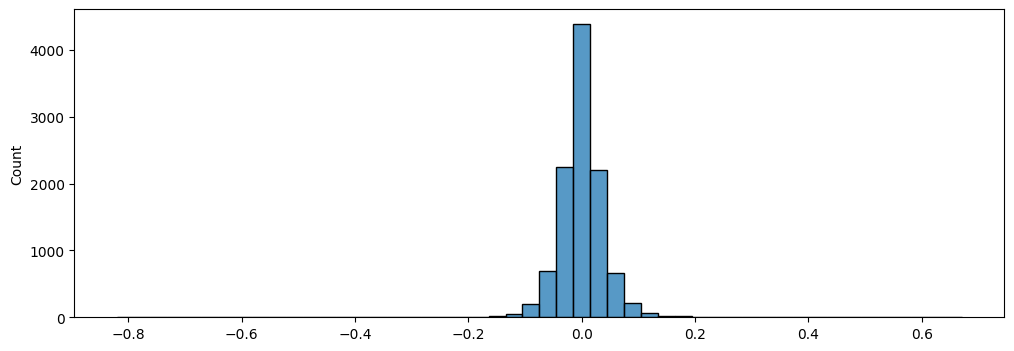

In [231]:
plt.figure(figsize=(12,4))
sns.histplot(np.diff(np.log(AAPL['Close']),2),bins=50)

In [229]:
res = distfit()
res.fit_transform(np.diff(np.log(AAPL['Close']),2))
res.summary

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 197.69] [loc=0.000 scale=0.040]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2485.47] [loc=-0.820 scale=0.820]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 2485.47] [loc=-134217728.820 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [0.05 sec] [RSS: 30.2241] [loc=0.000 scale=0.028]
[distfit] >INFO> [t         ] [0.21 sec] [RSS: 19.7775] [loc=-0.000 scale=0.027]
[distfit] >INFO> [genextreme] [0.37 sec] [RSS: 1071.35] [loc=-0.008 scale=0.080]
[distfit] >INFO> [gamma     ] [0.08 sec] [RSS: 483.778] [loc=-0.860 scale=0.003]
[distfit] >INFO> [lognorm   ] [0.17 sec] [RSS: 198.381] [loc=-22.527 scale=22.527]
[distfit] >INFO> [beta      ] [0.17 sec] [RSS: 198.055] [loc=-11.277 scale=18.334]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2380.97] [loc=-0.820 scale=1.492]
[distfit] >INFO> [loggamma  ] [0.08 sec] [RSS: 203.738] [loc=-11.161 scale=1.533]
[distfit] >INFO> Compute confidence interva

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,t,19.777525,-0.000482,0.026621,"(3.5411065520228857,)","(3.5411065520228857, -0.0004816415951733903, 0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,dweibull,30.224138,0.000021,0.027531,"(1.010077032440543,)","(1.010077032440543, 2.0789423665034485e-05, 0....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,norm,197.690385,0.000006,0.039973,(),"(5.69194183104308e-06, 0.0399734980064893)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,198.054841,-11.276785,18.333775,"(30610.892737397007, 19156.297841664484)","(30610.892737397007, 19156.297841664484, -11.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,lognorm,198.380504,-22.527081,22.527153,"(0.0017759572585595114,)","(0.0017759572585595114, -22.527080676067513, 2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,loggamma,203.737515,-11.161189,1.533138,"(1451.367116213596,)","(1451.367116213596, -11.161188967257743, 1.533...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,gamma,483.778022,-0.859731,0.003287,"(261.89820075148566,)","(261.89820075148566, -0.8597313343809854, 0.00...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,genextreme,1071.34602,-0.008056,0.080148,"(0.10141161429005402,)","(0.10141161429005402, -0.008055945921288183, 0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,uniform,2380.965126,-0.820385,1.491617,(),"(-0.8203852953097864, 1.4916167632738668)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,pareto,2485.469687,-134217728.820385,134217728.0,"(163602146.51822665,)","(163602146.51822665, -134217728.8203853, 13421...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:-0.000482, scale:0.026621)


(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=3.54111, loc=-0.000481642, scale=0.0266214)'}, xlabel='Values', ylabel='Frequency'>)

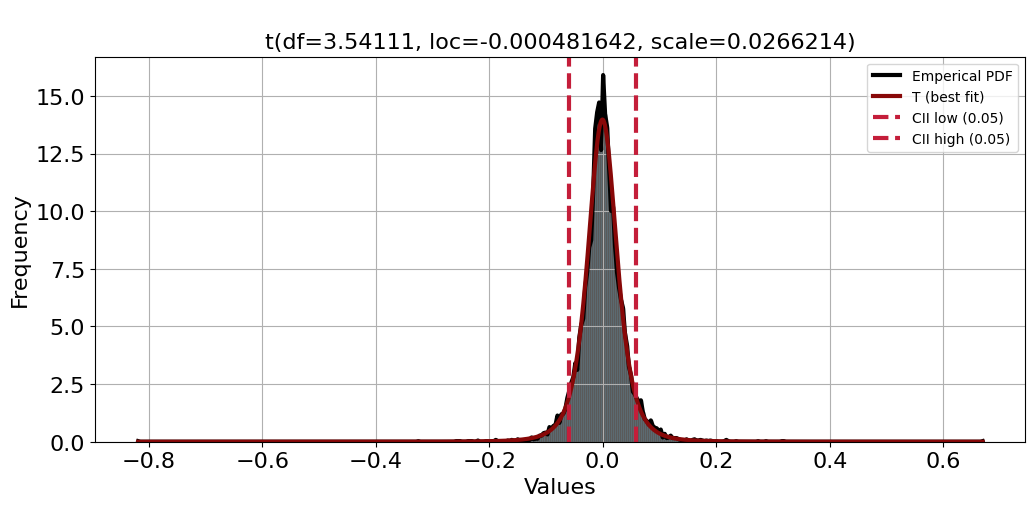

In [230]:
res.plot(figsize=(12,5))

## Complete Examples

### The Wine Dataset

In the wine dataset above we saw that if we used LDA projection, the data points seem to be seperated. Let us statistically verify if this is the case.

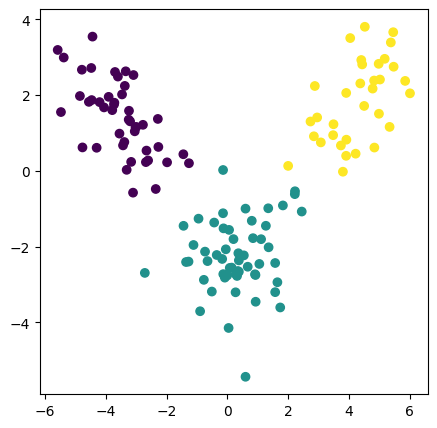

In [271]:
X = wine['data']['features']
y = wine['data']['targets']
y = y.to_numpy().reshape(y.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X,y)

projector = LDA(n_components=2)
X_projected = projector.fit_transform(X_train,y_train)

plt.figure(figsize=(5,5))
plt.scatter(X_projected[:,0],X_projected[:,1],c=y_train)

In [270]:
classifier = SVC()

classifier.fit(X_projected,y_train)
X_test_projected = projector.transform(X_test)

y_predicted = classifier.predict(X_test_projected)

confusion_matrix(y_test,y_predicted)

array([[15,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 11]])

### The Car Dataset

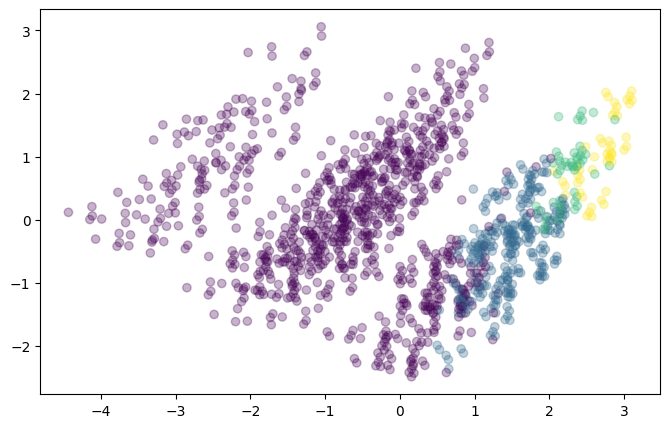

In [282]:
X = OneHotEncoder(sparse_output=False).fit_transform(cars['data']['features'])
y = cars['data']['targets'].replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

y = y.to_numpy().reshape(y.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X,y)

projector = LDA(n_components=2)
X_projected = projector.fit_transform(X_train,y_train)

plt.figure(figsize=(8,5))
plt.scatter(X_projected[:,0],X_projected[:,1],c=y_train,alpha=0.3)

In [286]:
classifier = SVC()

classifier.fit(X_projected,y_train)
X_test_projected = projector.transform(X_test)

y_predicted = classifier.predict(X_test_projected)

confusion_matrix(y_test,y_predicted)

array([[278,  16,   1,   0],
       [  6,  95,   1,   1],
       [  0,   6,  10,   1],
       [  0,   1,   4,  12]])

In [287]:
classifier = SVC()

classifier.fit(X_train,y_train)
y_predicted = classifier.predict(X_test)

confusion_matrix(y_test,y_predicted)

array([[287,   8,   0,   0],
       [  0,  98,   3,   2],
       [  0,   2,  13,   2],
       [  0,   1,   0,  16]])

### Student Mental Health

This data is from [kaggle](https://www.kaggle.com/datasets/shariful07/student-mental-health).

In [292]:
mental = pd.read_csv('../shared/data/Student Mental health.csv')
mental

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [312]:
mental.replace({'Yes': 1, 'No': 0, 'Male':0, 'Female':1}, inplace=True)
mental.replace({f'(?i)Year {n}': n for n in range(5)},regex=True, inplace=True)
mental.replace({'0 - 1.99': 0, '2.00 - 2.49': 2, '2.50 - 2.99': 3, '3.00 - 3.49': 4, '3.50 - 4.00': 5, '3.50 - 4.00 ': 6}, inplace=True)
mental.replace({np.nan: 0},inplace=True)
mental

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,Engineering,1,4,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,Islamic education,2,4,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,BIT,1,4,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,Laws,3,4,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,Mathemathics,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,1,21.0,BCS,1,5,0,0,1,0,0
97,13/07/2020 21:21:42,0,18.0,Engineering,2,4,0,1,1,0,0
98,13/07/2020 21:22:56,1,19.0,Nursing,3,5,1,1,0,1,0
99,13/07/2020 21:23:57,1,23.0,Pendidikan Islam,4,5,0,0,0,0,0


In [365]:
ct = pd.crosstab(mental['Do you have Panic attack?'],mental['Do you have Anxiety?'])
print(ct)
chi2_contingency(ct,lambda_="log-likelihood")

Do you have Anxiety?        0   1
Do you have Panic attack?        
0                          47  21
1                          20  13


Chi2ContingencyResult(statistic=0.3864484904564476, pvalue=0.5341721585654509, dof=1, expected_freq=array([[45.10891089, 22.89108911],
       [21.89108911, 11.10891089]]))

In [366]:
ct = pd.crosstab(mental['Choose your gender'],mental['Marital status'])
print(ct)
chi2_contingency(ct,lambda_="log-likelihood")

Marital status       0   1
Choose your gender        
0                   23   3
1                   62  13


Chi2ContingencyResult(statistic=0.1531200737792664, pvalue=0.6955713589014157, dof=1, expected_freq=array([[21.88118812,  4.11881188],
       [63.11881188, 11.88118812]]))

In [367]:
ct = pd.crosstab(mental['Do you have Panic attack?'],mental['Marital status'])
print(ct)
chi2_contingency(ct,lambda_="log-likelihood")

Marital status              0   1
Do you have Panic attack?        
0                          62   6
1                          23  10


Chi2ContingencyResult(statistic=5.786809495402911, pvalue=0.016146868028776545, dof=1, expected_freq=array([[57.22772277, 10.77227723],
       [27.77227723,  5.22772277]]))

In [368]:
ct = pd.crosstab(mental['Do you have Depression?'],mental['Marital status'])
print(ct)
chi2_contingency(ct,lambda_="log-likelihood")

Marital status            0   1
Do you have Depression?        
0                        66   0
1                        19  16


Chi2ContingencyResult(statistic=34.339627839498135, pvalue=4.628605495498958e-09, dof=1, expected_freq=array([[55.54455446, 10.45544554],
       [29.45544554,  5.54455446]]))

In [369]:
ct = pd.crosstab(mental['Do you have Anxiety?'],mental['Marital status'])
print(ct)
chi2_contingency(ct,lambda_="log-likelihood")

Marital status         0  1
Do you have Anxiety?       
0                     58  9
1                     27  7


Chi2ContingencyResult(statistic=0.4029367422322525, pvalue=0.5255764850065542, dof=1, expected_freq=array([[56.38613861, 10.61386139],
       [28.61386139,  5.38613861]]))

### Celeb-A Dataset


In [371]:
def tfGetData(df,N,attr=None):
    X = []
    y = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X.append(u['image'].numpy())
        if attr == None:
            y.append(u['label'].numpy())
        else:
            y.append(fn.get(u['attributes'][attr].numpy(),0))
    return np.array(X),np.array(y)

2023-10-30 00:01:55.622582: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


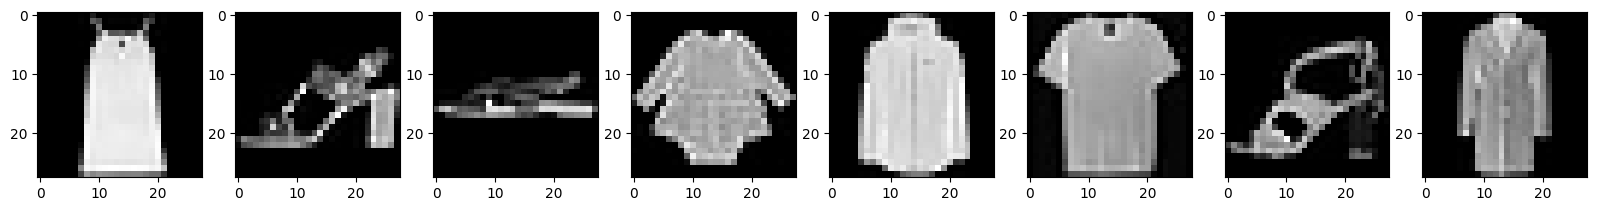

In [395]:
fashion_data,fashion_info = tfds.load("fashion_mnist", split="train",
                                  with_info=True,
                                  data_dir='/home/kaygun/local/data/tensorflow_datasets/')
N = 1200
m = 8
xs,ys = tfGetData(fashion_data,N)
fig, ax = plt.subplots(ncols=m, figsize=(20,8))
for i in range(m):
    j = np.random.randint(N)
    ax[i].imshow(xs[j],cmap='gray')

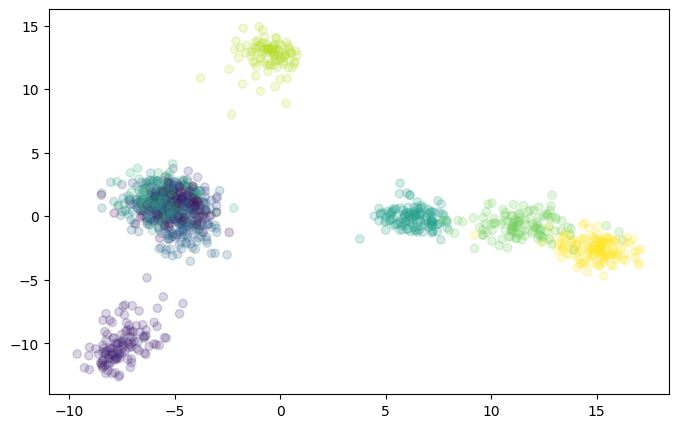

In [396]:
projector = LDA(n_components=2)

X_projected = projector.fit_transform(xs.reshape((1200,28*28)),ys)
plt.figure(figsize=(8,5))
plt.scatter(X_projected[:,0],X_projected[:,1],c=ys,alpha=0.2)

2023-10-30 00:02:00.533332: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


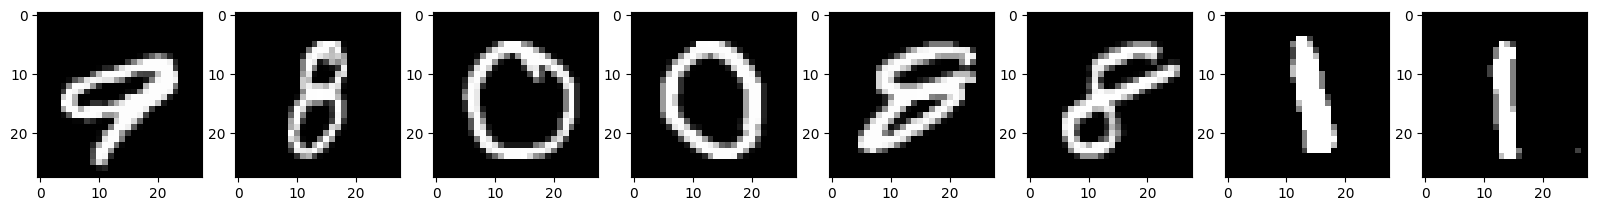

In [397]:
mnist_data,mnist_info = tfds.load("mnist", split="train",
                                  with_info=True,
                                  data_dir='/home/kaygun/local/data/tensorflow_datasets/')
N = 1200
m = 8
xs,ys = tfGetData(mnist_data,N)
fig, ax = plt.subplots(ncols=m, figsize=(20,8))
for i in range(m):
    j = np.random.randint(N)
    ax[i].imshow(xs[j],cmap='gray')


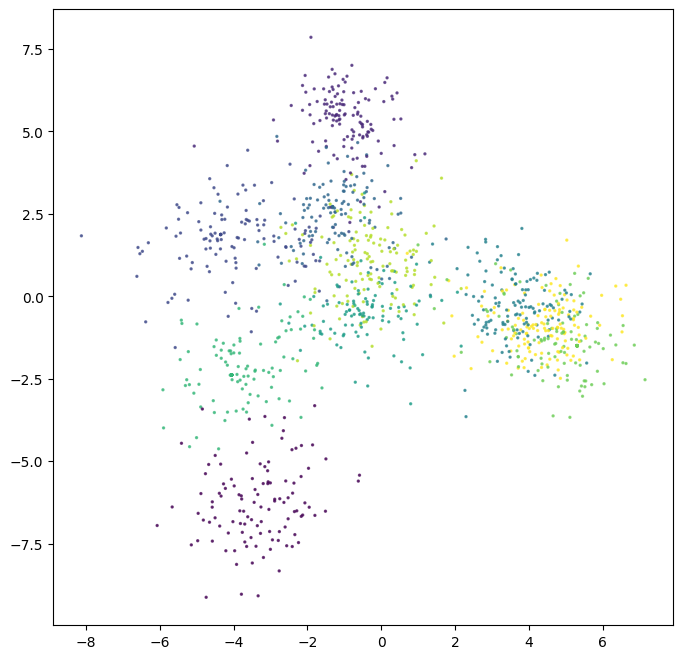

In [402]:
projector = LDA(n_components=2)

X_projected = projector.fit_transform(xs.reshape((1200,28*28)),ys)
plt.figure(figsize=(8,8))
plt.scatter(X_projected[:,0],X_projected[:,1],c=ys,alpha=0.7,s=2)